# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Parametros-iniciales" data-toc-modified-id="Parametros-iniciales-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parametros iniciales</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-motor" data-toc-modified-id="Rotación-de-P4---referencia-motor-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Rotación de P4 - referencia motor</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-polarizador" data-toc-modified-id="Rotación-de-P4---referencia-polarizador-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Rotación de P4 - referencia polarizador</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Final</a></div>

# Determinación de los parámetros de los polarizadores lineales

**Autor**: Jesús del Hoyo

**Fecha**:   25/09/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

In this case, we are going to record all experimental measurements needed for the characterization of the polarimeter. We will introduce elements one after the other. Light will be measured by a photodetector (), while the variables will be one or two rotation angles.

**Illumination**:
1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm.
1. Lente colimadora de Thorlabs DG10-600-B.
1. Beam sampler.
1.1. Photodiode ... (PHD1)
2.1. Polarizador LPNIRE100-B (P0)
2.1. Retardador WPQ10E-850-SP (R0)

**Intensity calibration**
Photodiode linearity will be measured manually for both photodiodes varying laser diode intensity. Then, the intensity will be chosen to be in the topmost part of the linear regime to maximize signal. The intensity value will allow having an absolute value of Imax.
Intensity value without light will be measured for each experiment.

**1st experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Polarizador 1 LPNIRE100-B (P2).

Important: This experiment is repeated three times changing alternatively P1 and P2 by another polarizer P3. In this way, we can discriminate P1 and P2 (and P3) Jones matrices, so we eliminate the assumption P1 = P2.

Variables: 
1. 1D, second polarizer rotation

Parameters that can be extracted from fit:
1. P1 and P2 (and P3) Jones matrices.

**2nd experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 2D, P1 and P2 rotation.
1. 2D, R1 and P2 rotation.

Parameters that can be extracted from fit:
1. Theta 0 of R1.
1. R parameters (moddeled as diattenuator retarder).

**3rd experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R2).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 2D, R1 and R2 rotation, both polarizers horizontal.
1. 2D, R1 and R2 rotation, first polarizer horizontal, second polarizer vertical.

Parameters that can be extracted from fit:
1. Theta 0 of R2.
1. Fine tuning of R parameters (moddeled as diattenuator retarder).



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import print_function, division

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import datetime
import pprint

from scipy.io import savemat, loadmat

from polarimeter.utils import dibujar_2d_fitting

## Preparar los experimentos

Tarjeta de adquisición de datos.

In [3]:
from polarimeter.daca import u3, LabJackPython, get_intensity, V, mV

In [4]:
# loads labjack
d=u3.U3()
data_callibration=d.getCalibrationData()
AIN_signal=1
AIN_ref=2

# print("\n Callibration data:")
# pprint.pprint(data_callibration)

## Check that daca is working
# 
# ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
# ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
# print(ainValue)

In [5]:
def medir_intensidades():
    I = np.array(
        [get_intensity(d=d, u=u3, AIN_number=AIN_signal, verbose=True), get_intensity(d=d, u=u3, AIN_number=AIN_ref, verbose=True)]
    )
    return I

Parametros iniciales

In [6]:
from polarimeter.polarimeter import get_polarimeter_parameters, degrees, degrees_motor

config_dicts=get_polarimeter_parameters(kind='exp')

pol1,pol2,pol3,pol4=config_dicts
theta1=pol1['theta_axis']
theta4=pol4['theta_axis']

print("theta_1={}º, theta_4={}º".format(theta1/degrees, theta4/degrees))

theta_1=-2.788º, theta_4=-161.88º


Motores

In [7]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels=[50,50,50,50]

In [8]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 3
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 4
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 5
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 7


## Iluminación 1

Medida de la linealidad del fotodiodo detector. De momento, la toma de datos se hace manual.

In [9]:
# Medir los valores
Naverage = 10
Twait = 0.5
Iindividual = np.zeros([Naverage,2])
for ind in range(Naverage):
    Iindividual[ind,:] = medir_intensidades()
    time.sleep(Twait)
# Promediar
mean = np.mean(Iindividual, axis=0)
error = np.std(Iindividual, axis=0)
ratio = mean[0] / mean[1]
# Print result
print('\nThe mean values are: P1 = {}; P2 = {}; Ratio = {}'.format(mean[0], mean[1], ratio))
print('The errors are: E1 = {}; E2 = {}'.format(error[0], error[1]))

5.8447, 4.2738, 5.8396, 4.2687, 5.8396, 4.2687, 5.8498, 4.2687, 5.8651, 4.2585, 5.8549, 4.2533, 5.8498, 4.2482, 5.8396, 4.2482, 5.8344, 4.2482, 5.8242, 4.2482, 
The mean values are: P1 = 5.84416549657; P2 = 4.25845479337; Ratio = 1.37236762632
The errors are: E1 = 0.0108424031591; E2 = 0.00997456993517


Guardar el nivel de Imax para una combinación de I, y V.

In [18]:
# Apagar diodo
intensity_max0 = medir_intensidades()

-0.0192, 0.0268, 

6.2029, 4.6371, 6.1108, 4.5859, 6.1210, 4.4529, 6.0494, 4.4887, 6.0084, 4.4120, 5.9214, 4.3813, 5.8805, 4.3096, 5.8498, 4.2636, 5.9112, 4.3045, 5.8754, 4.2789, 5.8089, 4.2431, 5.8498, 4.2738, 5.8498, 4.2585, 6.0442, 4.2840, 5.7884, 4.2329, 5.9265, 4.3454, 5.8396, 4.2585, 5.9470, 4.3147, 5.8907, 4.2431, 5.9675, 4.2124, 5.8447, 4.2124, 5.7730, 4.2278, 5.8037, 4.2738, 5.8805, 4.2124, 5.9265, 4.2175, 5.8856, 4.2380, 5.9112, 4.2687, 5.9879, 4.3045, 5.9572, 4.2789, 5.8958, 4.2533, 5.8856, 4.2533, 5.8754, 4.2636, 5.8754, 4.2738, 5.8703, 4.2636, 5.8651, 4.2636, 5.8754, 4.2636, 5.9061, 4.2636, 5.9112, 4.2687, 5.8856, 4.2585, 5.8754, 4.2533, 5.8549, 4.2482, 5.8344, 4.2431, 5.8293, 4.2380, 5.8037, 4.2329, 5.7730, 4.2329, 5.7628, 4.2278, 5.7423, 4.2124, 5.7372, 4.2175, 5.7423, 4.2175, 5.7372, 4.2175, 5.7014, 4.2073, 5.6963, 4.2022, 5.6912, 4.2073, 5.7065, 4.2175, 5.7475, 4.2124, 5.7730, 4.2278, 5.7833, 4.2278, 5.7833, 4.2329, 5.7986, 4.2380, 5.7986, 4.2380, 5.8293, 4.2380, 5.8447, 4.2329, 5.8498, 

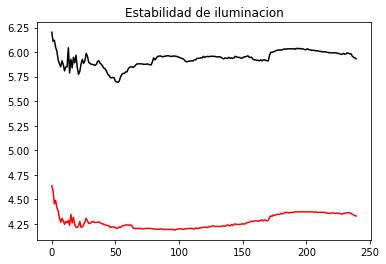

In [19]:
# I = 280 mA
# V = 2.26 V
Naverage = 240
Twait = 1
Iindividual = np.zeros([Naverage,2])
for ind in range(Naverage):
    Iindividual[ind,:] = medir_intensidades()
    time.sleep(Twait)
# Promediar
intensity_max = np.mean(Iindividual, axis=0)
error_Imax = np.std(Iindividual, axis=0)
# Print result
print('\nThe mean values are: P1 = {}; P2 = {};'.format(intensity_max[0], intensity_max[1]))
print('The errors are: E1 = {}; E2 = {}'.format(error_Imax[0], error_Imax[1]))
# Save data
filename="Intensidad_max_{}".format(datetime.date.today())
np.savez(filename+'.npz', Naverage=Naverage, Twait=Twait, Iindividual=Iindividual-intensity_max0)
plt.figure()                                                                                                                                                                                                                                                                                                                                                                                                                  
plt.plot(Iindividual[:,0],'k')
#plt.hold(True)
plt.plot(Iindividual[:,1],'r')
plt.title('Estabilidad de iluminacion')

Comprobar que la fuente es circularmente polarizada.

In [33]:
# Data of the experiment
num_data = 60
angle1 = sp.linspace(0,360,num_data)
intensity1 = np.zeros([num_data,2],dtype=float)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [0, 0, 0, angle], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i,:] = medir_intensidades()
intensity1 = intensity1[:,0] / intensity1[:,1]

# Plot results, 1D
plt.figure()                                                                                                                                                                                                                                                                                                                                                                                                                  
plt.plot(angle1, intensity1,'k')
plt.title('Senal')

2.8309, 4.1868, 2.7797, 4.1919, 2.7183, 4.1919, 2.6620, 4.1919, 2.6006, 4.1817, 2.5545, 4.1868, 2.5187, 4.1919, 2.4727, 4.1971, 2.4420, 4.1919, 2.4266, 4.1919, 2.4215, 4.1971, 2.4317, 4.1971, 2.4573, 4.2022, 2.4880, 4.1919, 2.5392, 4.1971, 2.5852, 4.1919, 2.6466, 4.1971, 2.7029, 4.1919, 2.7643, 4.1971, 2.8104, 4.1919, 2.8667, 4.1971, 2.9127, 4.1919, 2.9588, 4.1971, 2.9792, 4.1971, 2.9792, 4.1919, 2.9844, 4.1971, 2.9690, 4.1919, 2.9383, 4.1971, 2.9025, 4.1971, 2.8667, 4.1919, 2.8155, 4.1919, 2.7592, 4.1971, 2.6978, 4.1919, 2.6364, 4.1919, 2.5801, 4.1919, 2.5392, 4.1919, 2.4983, 4.1919, 2.4727, 4.1868, 2.4471, 4.1868, 2.4420, 4.1868, 2.4471, 4.1919, 2.4624, 4.1868, 2.4829, 4.1817, 2.5187, 4.1817, 2.5699, 4.1919, 2.6159, 4.1868, 2.6773, 4.1971, 2.7439, 4.1971, 2.8002, 4.1919, 2.8513, 4.1971, 2.8923, 4.1971, 2.9383, 4.2022, 2.9690, 4.2022, 2.9844, 4.1971, 2.9895, 4.1919, 2.9792, 4.1971, 2.9690, 4.1971, 2.9281, 4.2073, 2.8820, 4.2022, 2.8360, 4.2022, 

Ahora, vamos a medir la circularidad de la luz incidente, pues podría ser uno de los motivos por los que el modelo no funciona. 

Primero, usaremos el polarizador de eje conocido para tener una referencia absoluta del angulo de P1 en la posicion de P2.

In [34]:
# Background level
intensity_0 = medir_intensidades()

-0.0141, 0.0268, 

In [35]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = np.zeros([num_data,2],dtype=float)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [0, 0, 0, angle], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i,:] = medir_intensidades()
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_IlumA_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()                                                                                                                                                                                                                                                                                                                                                                                                                  
plt.plot(angle1, intensity1[:,0],'k')
#plt.hold(True)
plt.plot(angle1, intensity1[:,1],'r')
plt.title('Iluminacion + P1 + Pol E. C.')
plt.ylim(0,intensity1.max()*1.05)

2.2475, 4.1817, 2.1298, 4.1766, 2.0019, 4.1868, 1.8638, 4.1868, 1.7154, 4.1817, 1.5670, 4.1817, 1.4135, 4.1868, 1.2651, 4.1868, 1.1218, 4.1868, 0.9837, 4.1868, 0.8558, 4.1868, 0.7381, 4.1919, 0.6408, 4.1817, 0.5590, 4.1868, 0.4976, 4.1766, 0.4618, 4.1817, 0.4413, 4.1868, 0.4362, 4.1817, 0.4618, 4.1817, 0.5027, 4.1817, 0.5692, 4.1868, 0.6460, 4.1868, 0.7483, 4.1868, 0.8660, 4.1817, 0.9939, 4.1817, 1.1269, 4.1817, 1.2805, 4.1817, 1.4340, 4.1817, 1.5875, 4.1817, 1.7410, 4.1868, 1.8945, 4.1868, 2.0275, 4.1817, 2.1708, 4.1817, 2.2834, 4.1868, 2.3908, 4.1868, 2.4778, 4.1868, 2.5392, 4.1868, 2.5801, 4.1817, 2.6057, 4.1817, 2.6057, 4.1766, 2.5904, 4.1817, 2.5545, 4.1817, 2.4983, 4.1817, 2.4215, 4.1817, 2.3243, 4.1817, 2.2168, 4.1817, 2.0889, 4.1817, 1.9559, 4.1817, 1.8126, 4.1817, 1.6591, 4.1817, 1.5056, 4.1817, 1.3521, 4.1817, 1.2037, 4.1868, 1.0604, 4.1766, 0.9274, 4.1817, 0.8046, 4.1817, 0.6971, 4.1817, 0.6050, 4.1817, 0.5334, 4.1817, 0.4822, 4.1817, 0.4464, 4.1817, 0.4362, 4.1817, 0.4464, 

(0, 4.3733686286956077)

156.588828703


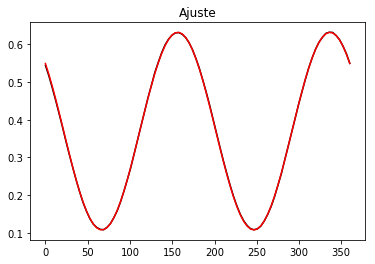

In [36]:
# Calcular origen de angulo
def malus(par, x):
    y = par[0] + par[1] * np.cos(x*degrees-par[2])**2
    return y
def malus_error(par, x, Iexp):
    y = malus(par, x)
    return Iexp - y

Inorm = intensity1[:,0]/intensity1[:,1]
par0 = [np.amin(Inorm), np.amax(Inorm), 0]
par1, success = sp.optimize.leastsq(malus_error, par0, args=(angle1, Inorm))
th0Ia = (par1[2]/degrees)%180
y = malus(par1, angle1)
#print(y)
print(th0Ia)
plt.figure()                                                                                                                                                                                                                                                                                                                                                                                                                  
plt.plot(angle1,Inorm,'k')
#plt.hold(True)
plt.plot(angle1,y,'r')
plt.title('Ajuste')

Ahora calculo el angulo para el polarizador, coloco R1 en el lugar del segundo retardador, y retiro el polarizador de eje conocido.

5.2972, 4.1971, 5.2562, 4.1919, 5.1488, 4.1919, 4.9953, 4.1868, 4.8060, 4.1919, 4.5706, 4.1868, 4.2738, 4.1868, 3.9514, 4.1919, 3.5933, 4.1919, 3.2044, 4.1971, 2.8155, 4.1919, 2.4113, 4.1971, 2.0173, 4.1971, 1.6386, 4.1919, 1.2805, 4.1919, 0.9581, 4.1868, 0.6818, 4.1868, 0.4515, 4.1817, 0.2724, 4.1868, 0.1496, 4.1868, 0.0780, 4.1868, 0.0729, 4.1766, 0.1240, 4.1868, 0.2264, 4.1919, 0.3799, 4.1971, 0.5692, 4.1919, 0.8097, 4.1919, 1.0860, 4.1919, 1.3726, 4.1817, 1.6847, 4.1868, 2.0173, 4.1868, 2.3499, 4.1919, 2.6773, 4.1919, 3.0151, 4.1971, 3.3323, 4.1971, 3.6393, 4.1919, 3.9617, 4.1971, 4.2380, 4.1919, 4.4938, 4.1868, 4.7139, 4.1919, 4.9134, 4.1868, 5.0669, 4.1971, 5.1744, 4.1971, 5.2409, 4.1919, 5.2869, 4.1919, 5.2562, 4.1919, 5.1948, 4.1919, 5.0669, 4.1919, 4.8878, 4.1868, 4.6729, 4.1919, 4.4120, 4.1919, 4.1049, 4.1919, 3.7672, 4.1868, 3.3988, 4.1919, 3.0202, 4.1868, 2.6211, 4.1868, 2.2168, 4.1971, 1.8382, 4.1919, 1.4698, 4.1971, 1.1269, 4.1971, 0.8251, 4.1971, 0.5641, 4.1919, 0.3594, 

(0, 5.5929689710959796)

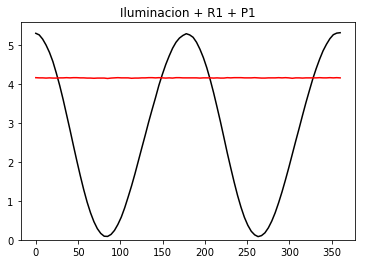

In [39]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = np.zeros([num_data,2],dtype=float)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [0, 0, angle, 0], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i,:] = medir_intensidades()
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_IlumB_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1[:,0],'k')
plt.plot(angle1, intensity1[:,1],'r')
plt.title('Iluminacion + R1 + P1')
plt.ylim(0,intensity1.max()*1.05)


175.686670628


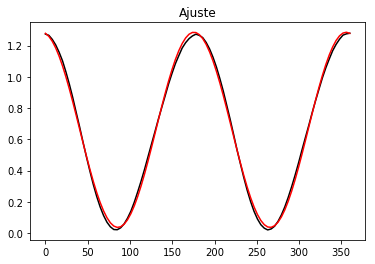

In [40]:
Inorm = intensity1[:,0]/intensity1[:,1]
par0 = [np.amin(Inorm), np.amax(Inorm), 0]
par1, success = sp.optimize.leastsq(malus_error, par0, args=(angle1, Inorm))
th0Ib = (par1[2]/degrees)%180
y = malus(par1, angle1)
#print(y)
print(th0Ib)
plt.figure()                                                                                                                                                                                                                                                                                                                                                                                                                  
plt.plot(angle1,Inorm,'k')
#plt.hold(True)
plt.plot(angle1,y,'r')
plt.title('Ajuste')

Analyce the source.

In [41]:
# Data of the experiment
num_dataX = 15
num_dataY = 14
angles2x = sp.linspace(0,360,num_dataX)
angles2y = sp.linspace(0,360,num_dataY)
intensities_2 = np.zeros([num_dataX, num_dataY, 2],dtype=float)
for ind1, angle1 in enumerate(angles2x):
    print("\n")
    for ind4, angle4 in enumerate(angles2y):
        motors.move(
            positions = [0, 0, angle1, angle4], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind4, :] = medir_intensidades()
intensity2 = intensities_2 - intensity_0
# Save data
filename="Experimento_IlumC_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2, intensity_max=intensity_max-intensity_max0)
# Plot results, 2D
dibujar_2d_fitting(angles2x, angles2y, intensity2[:,:,0], title='Ilum + R1 + P1 (ch1)')
dibujar_2d_fitting(angles2x, angles2y, intensity2[:,:,1], title='Ilum + R1 + P1 (ch2)')



5.3586, 4.1971, 4.3045, 4.1868, 1.8894, 4.1766, 0.1547, 4.1868, 0.6204, 4.1971, 2.9076, 4.2073, 5.0209, 4.1971, 5.1539, 4.2022, 3.1993, 4.1919, 0.8199, 4.1971, 0.0882, 4.2175, 1.6335, 4.2022, 4.1510, 4.2175, 5.4149, 4.2124, 

4.2431, 4.2175, 5.3637, 4.2175, 4.2073, 4.2226, 1.7768, 4.2124, 0.1496, 4.2175, 0.7585, 4.2124, 3.0560, 4.2226, 5.0772, 4.2175, 5.0772, 4.2175, 3.0355, 4.2226, 0.7381, 4.2226, 0.1496, 4.2226, 1.8024, 4.2278, 4.2431, 4.2226, 

1.7870, 4.2278, 4.1919, 4.2226, 5.3279, 4.2226, 4.2482, 4.2278, 1.8177, 4.2278, 0.1854, 4.2329, 0.7534, 4.2278, 3.0202, 4.2278, 5.0567, 4.2329, 5.0772, 4.2329, 3.0662, 4.2278, 0.7790, 4.2329, 0.1752, 4.2329, 1.7768, 4.2329, 

0.1445, 4.2278, 1.7051, 4.2278, 4.0896, 4.2124, 5.3381, 4.2278, 4.2380, 4.2226, 1.8382, 4.2226, 0.1752, 4.2226, 0.6920, 4.2278, 2.9281, 4.2124, 4.9850, 4.2226, 5.0720, 4.2226, 3.1020, 4.2278, 0.7943, 4.2124, 0.1445, 4.2124, 

0.6818, 4.2329, 0.1292, 4.2329, 1.7973, 4.2380, 4.2892, 4.2380, 5.3432, 4.2073, 4.1868, 4.2124

For the record, place the difusor and measure again.



1.0553, 4.1664, 0.3645, 4.1817, 0.5385, 4.1766, 1.4237, 4.1715, 2.2527, 4.1408, 2.3192, 4.1305, 1.5619, 4.1305, 0.6255, 4.1357, 0.3338, 4.1408, 0.9325, 4.1459, 1.9149, 4.1459, 2.4215, 4.1510, 2.0122, 4.1510, 1.0502, 4.1510, 

1.9763, 4.1459, 1.0246, 4.1459, 0.3645, 4.1510, 0.5692, 4.1561, 1.4544, 4.1561, 2.2629, 4.1561, 2.2987, 4.1561, 1.5261, 4.1612, 0.6153, 4.1664, 0.3492, 4.1612, 0.9683, 4.1715, 1.9354, 4.1715, 2.4062, 4.1766, 1.9815, 4.1357, 

2.4062, 4.1305, 1.9815, 4.1408, 1.0297, 4.1510, 0.3697, 4.1715, 0.5641, 4.1612, 1.4544, 4.1664, 2.2629, 4.1715, 2.3089, 4.1715, 1.5363, 4.1664, 0.6153, 4.1664, 0.3492, 4.1612, 0.9683, 4.1664, 1.9252, 4.1612, 2.4062, 4.1664, 

1.9405, 4.1510, 2.4062, 4.1510, 1.9712, 4.1510, 1.0093, 4.1510, 0.3543, 4.1561, 0.5692, 4.1664, 1.4698, 4.1664, 2.2834, 4.1664, 2.3141, 4.1817, 1.5158, 4.1715, 0.5999, 4.1766, 0.3492, 4.1561, 0.9734, 4.1612, 1.9354, 4.1612, 

1.0400, 4.1612, 2.0070, 4.1561, 2.4113, 4.1510, 1.9047, 4.1766, 0.9325, 4.1817, 0.3287, 4.1817

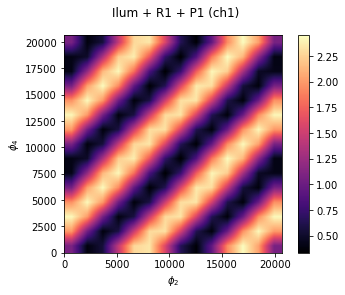

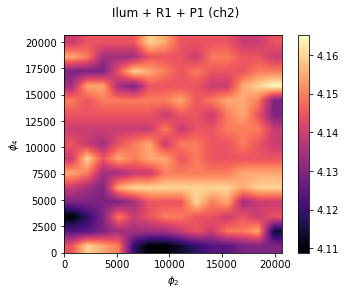

In [116]:
# Data of the experiment
num_dataX = 15
num_dataY = 14
angles2x = sp.linspace(0,360,num_dataX)
angles2y = sp.linspace(0,360,num_dataY)
intensities_2 = np.zeros([num_dataX, num_dataY, 2],dtype=float)
for ind1, angle1 in enumerate(angles2x):
    print("\n")
    for ind4, angle4 in enumerate(angles2y):
        motors.move(
            positions = [0, 0, angle1, angle4], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind4, :] = medir_intensidades()
intensity2 = intensities_2 - intensity_0
# Save data
filename="Experimento_IlumD_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2, intensity_max=intensity_max-intensity_max0)
# Plot results, 2D
dibujar_2d_fitting(angles2x, angles2y, intensity2[:,:,0], title='Ilum + R1 + P1 (ch1)')
dibujar_2d_fitting(angles2x, angles2y, intensity2[:,:,1], title='Ilum + R1 + P1 (ch2)')

##  1st experiment

Introduce P1 and P2.

In [117]:
# Background level
intensity_0 = medir_intensidades()

-0.0295, 0.0217, 

**Experiment 1a**

P3 and P1.

In [43]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = np.zeros([num_data,2],dtype=float)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [angle, 0, 0, 0], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i,:] = medir_intensidades()
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_1a_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1[:,0],'k')
plt.plot(angle1, intensity1[:,1],'r')
plt.title('P3 y P1')
plt.ylim(0,intensity1.max()*1.05)


2.5750, 4.1766, 2.6466, 4.2124, 2.6569, 4.2482, 2.6057, 4.2073, 2.5341, 4.1919, 2.4676, 4.1817, 2.3806, 4.1766, 2.2424, 4.1971, 2.1043, 4.1919, 1.9661, 4.1971, 1.7973, 4.1919, 1.6489, 4.1766, 1.4800, 4.2482, 1.2907, 4.1817, 1.1321, 4.1817, 0.9683, 4.2175, 0.7995, 4.2073, 0.6511, 4.1971, 0.5232, 4.1817, 0.3952, 4.1971, 0.2827, 4.1971, 0.1906, 4.1919, 0.1138, 4.2278, 0.0524, 4.2175, 0.0166, 4.1919, 0.0064, 4.1919, 0.0166, 4.1971, 0.0473, 4.2073, 0.1087, 4.2022, 0.1957, 4.2073, 0.2980, 4.2124, 0.4362, 4.1971, 0.5897, 4.2073, 0.7636, 4.1919, 0.9376, 4.2175, 1.1474, 4.1971, 1.3419, 4.2124, 1.5312, 4.2124, 1.7205, 4.1868, 1.9303, 4.2022, 2.1247, 4.2022, 2.2885, 4.2022, 2.3652, 4.1766, 2.4880, 4.2022, 2.5699, 4.2073, 2.6108, 4.2073, 2.6620, 4.1971, 2.6211, 4.2124, 2.5955, 4.2175, 2.5597, 4.1971, 2.4420, 4.2278, 2.3550, 4.2073, 2.1810, 4.1868, 2.0377, 4.2073, 1.8740, 4.2073, 1.7614, 4.2022, 1.5568, 4.2278, 1.3777, 4.2073, 1.2190, 4.1817, 1.0553, 4.2380, 0.8813, 4.2175, 0.7227, 4.2073, 0.5897, 

(0, 4.4324682047590613)

[-0.00376056  0.63052615  0.1527474 ]
8.7517815397


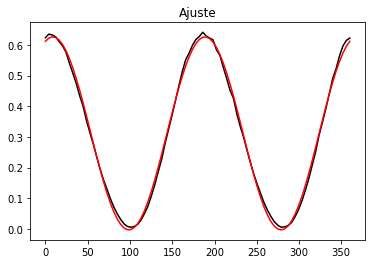

In [44]:
Inorm = intensity1[:,0]/intensity1[:,1]
par0 = [np.amin(Inorm), np.amax(Inorm), 0]
par1, success = sp.optimize.leastsq(malus_error, par0, args=(angle1, Inorm))
th0E1a = (par1[2]/degrees)%180
y = malus(par1, angle1)
#print(y)
print(par1)
print(th0E1a)
plt.figure()                                                                                                                                                                                                                                                                                                                                                                                                                  
plt.plot(angle1,Inorm,'k')
#plt.hold(True)
plt.plot(angle1,y,'r')
plt.title('Ajuste')



**Experiment 1b**

P3 and P2.

In [45]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = np.zeros([num_data,2],dtype=float)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [0, 0, 0, angle], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i,:] = medir_intensidades()
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_1b_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1[:,0],'k')
plt.plot(angle1, intensity1[:,1],'r')
plt.title('P3 y P2')
plt.ylim(0,intensity1.max()*1.05)

0.4464, 4.1561, 0.3134, 4.1561, 0.2008, 4.1510, 0.1189, 4.1510, 0.0524, 4.1561, 0.0115, 4.1561, 0.0012, 4.1561, 0.0217, 4.1510, 0.0626, 4.1510, 0.1394, 4.1510, 0.2315, 4.1561, 0.3543, 4.1561, 0.4873, 4.1510, 0.6408, 4.1561, 0.8097, 4.1510, 0.9990, 4.1561, 1.1883, 4.1510, 1.3828, 4.1510, 1.5721, 4.1561, 1.7614, 4.1510, 1.9456, 4.1561, 2.1145, 4.1510, 2.2731, 4.1510, 2.4062, 4.1561, 2.5290, 4.1510, 2.6211, 4.1510, 2.6978, 4.1510, 2.7388, 4.1510, 2.7592, 4.1561, 2.7490, 4.1510, 2.7081, 4.1459, 2.6415, 4.1510, 2.5545, 4.1510, 2.4420, 4.1561, 2.3089, 4.1561, 2.1605, 4.1561, 1.9917, 4.1510, 1.8075, 4.1510, 1.6130, 4.1510, 1.4186, 4.1510, 1.2242, 4.1612, 1.0400, 4.1612, 0.8558, 4.1664, 0.6767, 4.1561, 0.5232, 4.1612, 0.3799, 4.1612, 0.2571, 4.1612, 0.1547, 4.1612, 0.0831, 4.1612, 0.0268, 4.1612, 0.0012, 4.1612, 0.0115, 4.1664, 0.0371, 4.1561, 0.0985, 4.1561, 0.1803, 4.1612, 0.2827, 4.1612, 0.4157, 4.1612, 0.5641, 4.1561, 0.7227, 4.1561, 0.9018, 4.1612, 1.0911, 4.1612, 1.2805, 4.1612, 1.4698, 

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


(0, 4.3572505624964837)

23.7542981597


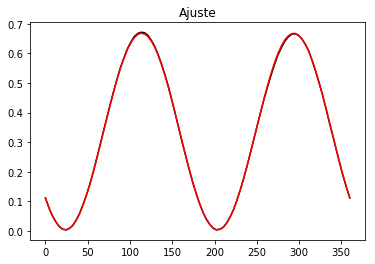

In [46]:
Inorm = intensity1[:,0]/intensity1[:,1]
par0 = [np.amin(Inorm), np.amax(Inorm), 0]
par1, success = sp.optimize.leastsq(malus_error, par0, args=(angle1, Inorm))
th0p2 = (par1[2]/degrees)%180
y = malus(par1, angle1)
#print(y)
print(th0p2)
plt.figure()                                                                                                                                                                                                                                                                                                                                                                                                                  
plt.plot(angle1,Inorm,'k')
#plt.hold(True)
plt.plot(angle1,y,'r')
plt.title('Ajuste')



**Experiment 1c**

P1 and P2.

2.1196, 4.2533, 2.1964, 4.2738, 2.2271, 4.2687, 2.2680, 4.2482, 2.2527, 4.2431, 2.2373, 4.2431, 2.2424, 4.2636, 2.1964, 4.2687, 2.1503, 4.2789, 2.0736, 4.2636, 1.9610, 4.2533, 1.8689, 4.2687, 1.7512, 4.2431, 1.6182, 4.2585, 1.4749, 4.2533, 1.3316, 4.2636, 1.1730, 4.2585, 1.0144, 4.2636, 0.8558, 4.2636, 0.6971, 4.2636, 0.5487, 4.2585, 0.4055, 4.2431, 0.2827, 4.2585, 0.1854, 4.2738, 0.0985, 4.2482, 0.0422, 4.2431, 0.0115, 4.2329, 0.0064, 4.2431, 0.0319, 4.2380, 0.0780, 4.2431, 0.1547, 4.2482, 0.2520, 4.2533, 0.3748, 4.2636, 0.5078, 4.2533, 0.6613, 4.2482, 0.8199, 4.2585, 0.9888, 4.2636, 1.1525, 4.2482, 1.3060, 4.2482, 1.4647, 4.2533, 1.6233, 4.2789, 1.7512, 4.2687, 1.8587, 4.2431, 1.9559, 4.2431, 2.0480, 4.2482, 2.1350, 4.2585, 2.1912, 4.2329, 2.2168, 4.2585, 2.2219, 4.2431, 2.2424, 4.2636, 2.2424, 4.2789, 2.2117, 4.2687, 2.1401, 4.2380, 2.0940, 4.2687, 1.9815, 4.2431, 1.9149, 4.2636, 1.8024, 4.2533, 1.6796, 4.2431, 1.5568, 4.2636, 1.4084, 4.2585, 1.2497, 4.2585, 1.0911, 4.2533, 0.9325, 

(0, 4.4647043371573094)

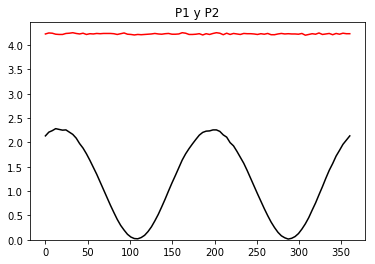

In [47]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = np.zeros([num_data,2],dtype=float)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [angle, 0, 0, 0], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i,:] = medir_intensidades()
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_1c_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1[:,0],'k')
plt.plot(angle1, intensity1[:,1],'r')
plt.title('P1 y P2')
plt.ylim(0,intensity1.max()*1.05)

17.3608944245


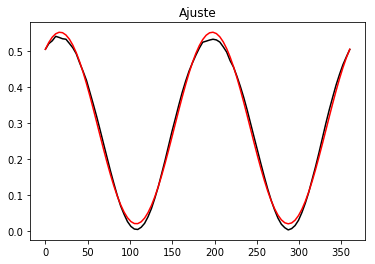

In [48]:
Inorm = intensity1[:,0]/intensity1[:,1]
par0 = [np.amin(Inorm), np.amax(Inorm), 0]
par1, success = sp.optimize.leastsq(malus_error, par0, args=(angle1, Inorm))
th0p1 = (par1[2]/degrees)%180
y = malus(par1, angle1)
#print(y)
print(th0p1)
plt.figure()                                                                                                                                                                                                                                                                                                                                                                                                                  
plt.plot(angle1,Inorm,'k')
#plt.hold(True)
plt.plot(angle1,y,'r')
plt.title('Ajuste')



## 2nd experiment

Place the first retarder, R1.

In [129]:
# Background level
intensity_0 = medir_intensidades()

-0.0295, 0.0217, 



1.8331, 4.2278, 1.8484, 4.2226, 1.7051, 4.2226, 1.4544, 4.2226, 1.1474, 4.2175, 0.8506, 4.2226, 0.6306, 4.2226, 0.5436, 4.2226, 0.6050, 4.2226, 0.8046, 4.2278, 1.0911, 4.2226, 1.4084, 4.2226, 1.6693, 4.2226, 1.8331, 4.2226, 

2.0940, 4.2124, 2.1503, 4.2073, 1.9763, 4.2073, 1.6182, 4.2073, 1.1525, 4.2073, 0.6920, 4.2073, 0.3338, 4.2022, 0.1803, 4.2380, 0.2366, 4.2380, 0.5078, 4.2073, 0.9325, 4.2073, 1.4084, 4.2073, 1.8280, 4.2073, 2.0940, 4.2073, 

2.2117, 4.2124, 2.2987, 4.2124, 2.1247, 4.2175, 1.7256, 4.2073, 1.1986, 4.2175, 0.6613, 4.2124, 0.2315, 4.2124, 0.0268, 4.2124, 0.0678, 4.2175, 0.3594, 4.2175, 0.8404, 4.2124, 1.3828, 4.2124, 1.8791, 4.2124, 2.2066, 4.2124, 

2.1912, 4.2431, 2.2936, 4.2482, 2.1452, 4.2431, 1.7921, 4.2482, 1.2856, 4.2431, 0.7585, 4.2482, 0.3236, 4.2482, 0.0933, 4.2533, 0.1138, 4.2431, 0.3645, 4.2482, 0.8199, 4.2533, 1.3419, 4.2533, 1.8228, 4.2482, 2.1657, 4.2482, 

1.9456, 4.2175, 2.0633, 4.2124, 1.9917, 4.2124, 1.7410, 4.2124, 1.3623, 4.2124, 0.9581, 4.2124

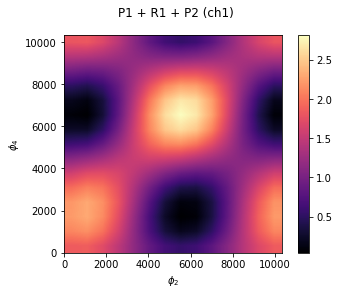

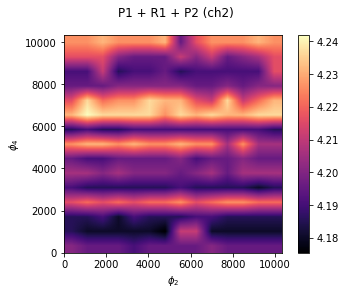

In [50]:
# Data of the experiment
num_dataX = 15
num_dataY = 14
angles2x = sp.linspace(0,180,num_dataX)
angles2y = sp.linspace(0,180,num_dataY)
intensities_2 = np.zeros([num_dataX, num_dataY, 2],dtype=float)
for ind1, angle1 in enumerate(angles2x):
    print("\n")
    for ind4, angle4 in enumerate(angles2y):
        motors.move(
            positions = [angle1, 0, 0, angle4], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind4, :] = medir_intensidades()
intensity2 = intensities_2 - intensity_0
# Save data
filename="Experimento_4_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2, intensity_max=intensity_max-intensity_max0)
# Plot results, 2D
dibujar_2d_fitting(angles2x, angles2y, intensity2[:,:,0], title='P1 + R1 + P2 (ch1)')
dibujar_2d_fitting(angles2x, angles2y, intensity2[:,:,1], title='P1 + R1 + P2 (ch2)')


## 3rd experiment

Place the second retarder, R2.

In [132]:
# Background level
intensity_0 =  medir_intensidades()

-0.0295, 0.0217, 



1.3163, 4.2022, 0.7585, 4.2022, 0.3338, 4.2022, 0.3134, 4.2022, 0.7227, 4.2022, 1.3470, 4.2022, 1.8945, 4.2073, 2.1708, 4.2022, 2.1912, 4.2022, 2.1196, 4.2124, 2.0736, 4.2022, 2.0019, 4.2022, 1.7819, 4.2073, 1.3163, 4.2022, 

0.8404, 4.2175, 0.3594, 4.2124, 0.0780, 4.2175, 0.0882, 4.2175, 0.4004, 4.2124, 0.9223, 4.2124, 1.4800, 4.2124, 1.9354, 4.2124, 2.2015, 4.2073, 2.2475, 4.2073, 2.1094, 4.2073, 1.7973, 4.2124, 1.3470, 4.2073, 0.8353, 4.2073, 

0.5487, 4.2073, 0.1292, 4.2073, 0.0217, 4.2073, 0.1906, 4.2073, 0.5027, 4.2073, 0.8506, 4.1868, 1.2139, 4.2073, 1.5926, 4.2073, 1.9610, 4.2022, 2.1912, 4.2073, 2.1503, 4.2022, 1.7768, 4.2022, 1.1730, 4.2022, 0.5487, 4.2073, 

0.6767, 4.2073, 0.2417, 4.2073, 0.2315, 4.2073, 0.5692, 4.2022, 0.9632, 4.2022, 1.1986, 4.2022, 1.2856, 4.2022, 1.3777, 4.2022, 1.6335, 4.2022, 1.9763, 4.1971, 2.1554, 4.1971, 1.9508, 4.1971, 1.3623, 4.2022, 0.6767, 4.2022, 

1.1781, 4.2022, 0.7125, 4.2073, 0.6920, 4.2022, 1.0758, 4.2073, 1.5414, 4.1971, 1.7410, 4.1868

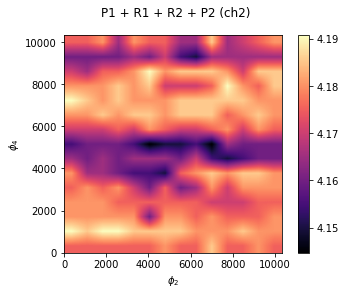

In [51]:
# Data of the experiment
num_dataX = 15
num_dataY = 14
angles2x = sp.linspace(0,180,num_dataX)
angles2y = sp.linspace(0,180,num_dataY)
intensities_2 = np.zeros([num_dataX, num_dataY, 2],dtype=float)
for ind1, angle1 in enumerate(angles2x):
    print("\n")
    for ind4, angle4 in enumerate(angles2y):
        motors.move(
            positions = [0, angle1, angle4, 0], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind4, :] = medir_intensidades()
intensity2 = intensities_2 - intensity_0
# Save data
filename="Experimento_5a_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2, intensity_max=intensity_max-intensity_max0)
# Plot results, 2D
dibujar_2d_fitting(angles2x, angles2y, intensity2[:,:,0], title='P1 + R1 + R2 + P2 (ch1)')
dibujar_2d_fitting(angles2x, angles2y, intensity2[:,:,1], title='P1 + R1 + R2 + P2 (ch2)')



Same, rotating the second polarizer 90º.

In [ ]:
# Background level
intensity_0 = medir_intensidades()



0.9683, 4.1664, 1.5516, 4.1817, 1.9763, 4.1664, 1.9968, 4.1766, 1.5721, 4.1715, 0.9274, 4.1715, 0.3697, 4.1715, 0.0882, 4.1868, 0.0626, 4.1868, 0.1343, 4.1919, 0.1906, 4.1868, 0.2622, 4.1868, 0.5027, 4.1919, 0.9683, 4.1919, 

1.4647, 4.1868, 1.9456, 4.1868, 2.2373, 4.1817, 2.2219, 4.1817, 1.8996, 4.1817, 1.3623, 4.1766, 0.7892, 4.1766, 0.3287, 4.1766, 0.0626, 4.1612, 0.0115, 4.1612, 0.1547, 4.1664, 0.4720, 4.1715, 0.9274, 4.1664, 1.4647, 4.1664, 

1.7512, 4.1766, 2.1759, 4.1715, 2.2782, 4.1766, 2.1043, 4.1715, 1.7870, 4.1715, 1.4340, 4.1817, 1.0553, 4.1715, 0.6715, 4.1766, 0.2929, 4.1715, 0.0575, 4.1664, 0.0985, 4.1561, 0.4822, 4.1408, 1.1065, 4.1459, 1.7358, 4.1459, 

1.6079, 4.1459, 2.0480, 4.1459, 2.0429, 4.1459, 1.7000, 4.1459, 1.2958, 4.1459, 1.0553, 4.1459, 0.9683, 4.1408, 0.8711, 4.1459, 0.6153, 4.1459, 0.2673, 4.1459, 0.0933, 4.1459, 0.3031, 4.1459, 0.9069, 4.1408, 1.6079, 4.1459, 

1.0962, 4.1357, 1.5670, 4.1357, 1.5823, 4.1408, 1.1781, 4.1357, 0.6971, 4.1357, 0.4925, 4.1459

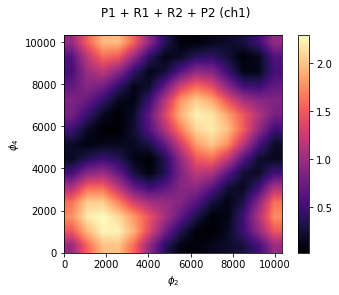

In [52]:
# Data of the experiment
num_dataX = 15
num_dataY = 14
angles2x = sp.linspace(0,180,num_dataX)
angles2y = sp.linspace(0,180,num_dataY)
intensities_2 = np.zeros([num_dataX, num_dataY, 2],dtype=float)
for ind1, angle1 in enumerate(angles2x):
    print("\n")
    for ind4, angle4 in enumerate(angles2y):
        motors.move(
            positions = [0, angle1, angle4, 90], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind4, :] = medir_intensidades()
intensity2 = intensities_2 - intensity_0
# Save data
filename="Experimento_5b_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2, intensity_max=intensity_max-intensity_max0)
# Plot results, 2D
dibujar_2d_fitting(angles2x, angles2y, intensity2[:,:,0], title='P1 + R1 + R2 + P2 (ch1)')
dibujar_2d_fitting(angles2x, angles2y, intensity2[:,:,1], title='P1 + R1 + R2 + P2 (ch2)')



## Final

In [53]:
motors.close()
del motors
LabJackPython.Close()